In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
def build_url(offset):
    '''
    Build the url to scrape: use the Daily Mail's pattern on the search page for Rita Ora headlines
    
    Inputs: offset (int) - the "offset" from 0 of numbered headlines from 0 to ~2300
    Returns: url (str) - url to scrape
    '''
    root = 'https://www.dailymail.co.uk/home/search.html?offset='
    end = '&size=50&sel=site&searchPhrase=rita+ora&sort=recent&type=article&topic=Rita+Ora&days=all'
    url = root + offset + end
    return url

In [3]:
def gather_headlines(url):
    '''
    Pull the text of headlines that mention the name 'Rita'
    
    Inputs: url (str) - the url with a list of headlines to scrape
    Returns: headlines (lst) - list of headlines as strings
    '''
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    resultSet = soup.findAll('a')
    headlines = []
    for elem in resultSet:
        if 'rita' in str(elem) or 'Rita' in str(elem):
            headlines.append(str(elem))
    return headlines

In [4]:
# Loop through all the pages of Rita headlines on the Daily Mail from most recent to oldest
all_headlines = []

for offset in range(0, 2000, 50):
    int_url = build_url(str(offset))
    int_headlines = gather_headlines(int_url)
    all_headlines += int_headlines

In [5]:
# Clear out html characters from the headlines, isolate just the headline text
clean_headlines = []
for elem in all_headlines:
    if '<a href' in elem:
        splits = elem.split(">")
        clean_headlines.append(splits[1])

In [6]:
# A little more cleanup of html characters
final_headlines = []
for h in clean_headlines:
    if h!= 'TV&amp;Showbiz </a':
        final_headlines.append(h.replace('</a', ''))

In [7]:
# Download the stopwords before you call the next line
# Also download the tokenizer: nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stop_chars = [',', '&', 'amp', ':', ';', "'s", "n't", "I", "-", '?', '!', '(', ')', "'", "The"]

In [8]:
# Drop stop words (common words like "a", "the", etc.)
rita_words = []
for h in final_headlines:
    word_tokens = word_tokenize(h)
    for w in word_tokens:
        if w not in stop_words and w not in stop_chars:
            rita_words.append(w)

In [9]:
# Create a counter dictionary of word frequency
word_cloud_dict = Counter(rita_words)

In [10]:
# Make the word cloud!
word_cloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)

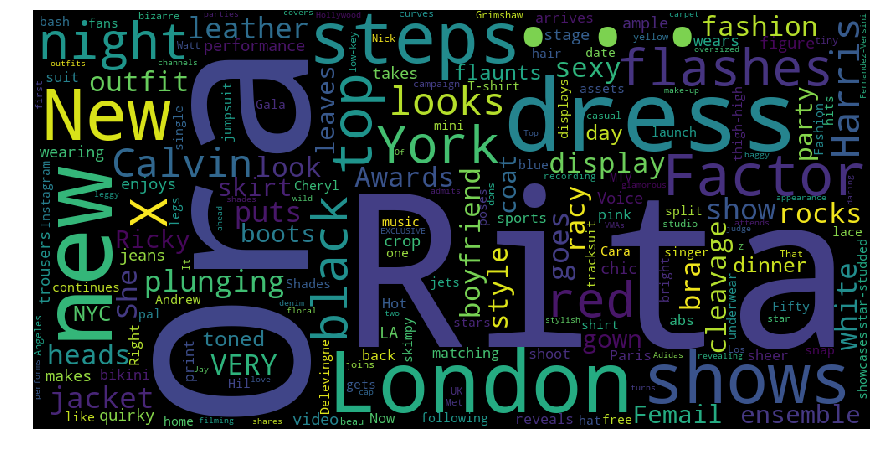

In [11]:
# Plot the word cloud!
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig("rita.png", bbox_inches='tight')
plt.show()
plt.close()

In [12]:
# "Rita" and "Ora" obviously appear a lot, but let's see how the word cloud looks if we drop her name and
# identify only words that are not her name in headlines that pertain to her
rita_words_noname = []
for word in rita_words:
    if word != "Rita" and word != "Ora":
        rita_words_noname.append(word)

In [13]:
word_cloud_dict2 = Counter(rita_words_noname)

In [14]:
word_cloud2 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict2)

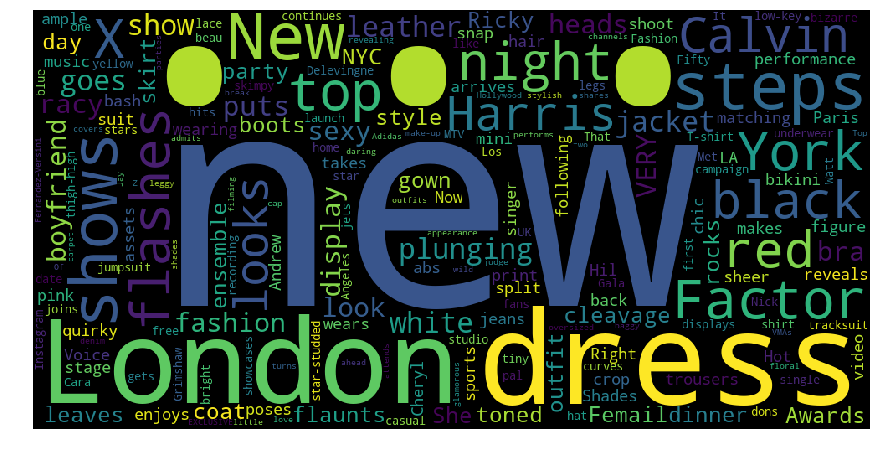

In [15]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud2)
plt.axis("off")
plt.savefig("rita2.png", bbox_inches='tight')
plt.show()
plt.close()